# Pokemon Analysis

### Table of Contents
1. [Analysis](##analysis)
2. [Generation](##generation)
3. [Type](##type)
4. [Height & Weight](##height-&-weight)
5. [Gender Encounter Rate](##gender-encounter-rate)
6. [Get Rate](##get-rate)
7. [Stats](#stats-on-pokemon)

### Summary of Analysis


## Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import os

In [2]:
# Create a dataframe from the csv file saved in the data folder
df = pd.read_csv('data/Pokedex_Ver_SV2.csv')

# Create a dataframe with the unique number of pokemon (merging forms)
pokedex = df.drop_duplicates(subset=['Original_Name'], keep='first').copy()

# Count the number of unique pokemon
count_pokedex = pokedex['Original_Name'].count()

# Create a dataframe with all of the pokemon
national_dex = df.copy()

# Count the number of pokemon in national_dex
count_national_dex = national_dex['Original_Name'].count()

# pokedex.head()
# national_dex.head()

## Generation
* Mode
* Bar Chart of each generation
* ~~Comparision of same type of pokemon across generations (t-test); Create a dataframe that has the 1 generation and the last generation released~~

In [3]:
#Group by method to calculate pokemon in a generation
group_by_pokedex = pokedex.groupby("Generation").count()
group_by_pokedex

,No,Branch_Code,Original_Name,Name,Height,Weight,Type1,Type2,Ability1,Ability2,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
Generation,,,,,,,,,,,,,,,,,,,,,
1,151,151,151,151,151,151,151,67,151,99,...,151,151,151,151,151,151,151,151,151,151
2,99,99,99,99,99,99,99,48,99,64,...,99,99,99,99,99,99,99,99,99,99
3,135,135,135,135,135,135,135,66,135,60,...,135,135,135,135,135,135,135,135,135,135
4,107,107,107,107,107,107,107,53,107,47,...,107,107,107,107,107,107,107,107,107,107
5,156,156,156,156,156,156,156,74,156,106,...,156,156,156,156,156,156,156,156,156,156
6,72,72,72,72,72,72,72,41,72,31,...,72,72,72,72,72,72,72,72,72,72
7,88,88,88,88,88,88,88,55,88,30,...,88,88,88,88,88,88,88,88,88,88
8,96,96,96,96,96,96,96,44,96,50,...,96,96,96,96,96,96,96,96,96,96
9,106,106,106,106,106,106,106,65,106,40,...,106,106,106,106,106,106,106,106,106,106


In [4]:
#Group by method to calculate pokemon in each generation
group_by_national_dex = national_dex.groupby("Generation").count()
group_by_national_dex

,No,Branch_Code,Original_Name,Name,Height,Weight,Type1,Type2,Ability1,Ability2,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
Generation,,,,,,,,,,,,,,,,,,,,,
1,167,167,167,167,167,167,167,78,167,100,...,167,167,167,167,167,167,167,167,167,167
2,106,106,106,106,106,106,106,55,106,65,...,106,106,106,106,106,106,106,106,106,106
3,163,163,163,163,163,163,163,82,163,60,...,163,163,163,163,163,163,163,163,163,163
4,128,128,128,128,128,128,128,70,128,49,...,128,128,128,128,128,128,128,128,128,128
5,169,169,169,169,169,169,169,85,169,110,...,169,169,169,169,169,169,169,169,169,169
6,85,85,85,85,85,85,85,53,85,38,...,85,85,85,85,85,85,85,85,85,85
7,122,122,122,122,122,122,122,83,122,43,...,122,122,122,122,122,122,122,122,122,122
8,145,145,145,145,145,145,145,84,145,75,...,145,145,145,145,145,145,145,145,145,145
9,118,118,118,118,118,118,118,72,118,48,...,118,118,118,118,118,118,118,118,118,118


In [5]:


#mode
pokedex_mode= pokedex["Generation"].mode()
pokedex_mode


0    5
Name: Generation, dtype: int64

<Axes: title={'center': 'Pokemon Across Generations'}, xlabel='Generation', ylabel='Number of Pokemon'>

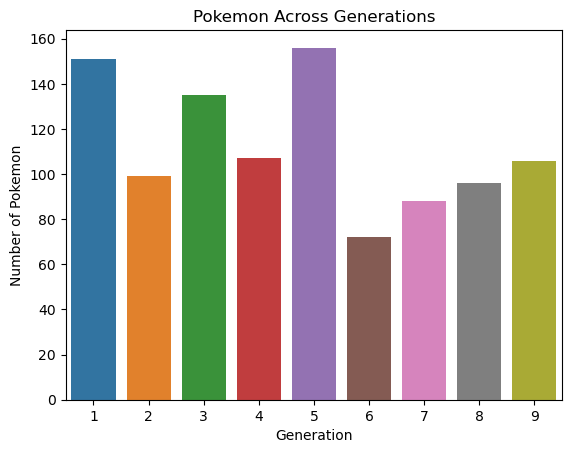

In [6]:
#plotting the bar graph of generation distribution
generation_plot= sns.countplot(x = "Generation",data=pokedex)
generation_plot.set_ylabel("Number of Pokemon")
generation_plot.set_title("Pokemon Across Generations")
generation_plot

<Axes: title={'center': 'Pokemon Across Generations'}, xlabel='Generation', ylabel='Number of Pokemon'>

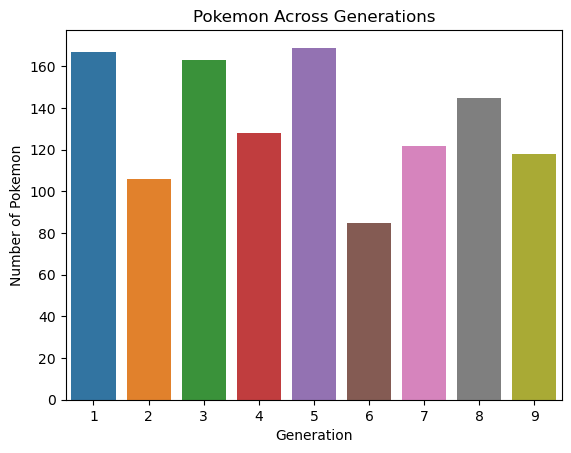

In [7]:
nat_generation_plot= sns.countplot(x = "Generation",data=national_dex)
nat_generation_plot.set_ylabel("Number of Pokemon")
nat_generation_plot.set_title("Pokemon Across Generations")
nat_generation_plot

## Type
* Percentage, frequencies, bar chart - How many are in each type?
* Create column to combine type 1 and type 2 columns (alphabetical order on combination)
* Bar chart of each type combination
* Focus on sections of the data that are interesting
* Which combinations are missing or not well represented?
* Which combinations are the most frequent?

In [8]:
#number of types 
group_by_main_type = pokedex.groupby("Type1").count()
group_by_main_type



,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type2,Ability1,Ability2,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
Type1,,,,,,,,,,,,,,,,,,,,,
Bug,83,83,83,83,83,83,83,60,83,40,...,83,83,83,83,83,83,83,83,83,83
Dark,45,45,45,45,45,45,45,32,45,29,...,45,45,45,45,45,45,45,45,45,45
Dragon,37,37,37,37,37,37,37,24,37,13,...,37,37,37,37,37,37,37,37,37,37
Electric,58,58,58,58,58,58,58,23,58,28,...,58,58,58,58,58,58,58,58,58,58
Fairy,29,29,29,29,29,29,29,8,29,12,...,29,29,29,29,29,29,29,29,29,29
Fighting,40,40,40,40,40,40,40,12,40,27,...,40,40,40,40,40,40,40,40,40,40
Fire,65,65,65,65,65,65,65,29,65,14,...,65,65,65,65,65,65,65,65,65,65
Flying,9,9,9,9,9,9,9,6,9,7,...,9,9,9,9,9,9,9,9,9,9
Ghost,35,35,35,35,35,35,35,19,35,11,...,35,35,35,35,35,35,35,35,35,35


<Axes: title={'center': 'Unique Pokemon Primary Type'}, xlabel='Type1', ylabel='Number of Pokemon'>

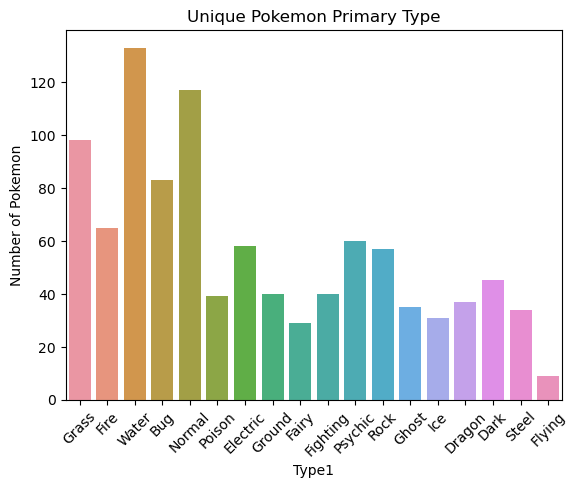

In [9]:
#plotting the bar graph of single typing distribution
single_type_plot= sns.countplot(x = "Type1",data=pokedex)
plt.xticks(rotation=45)
single_type_plot.set_ylabel("Number of Pokemon")
single_type_plot.set_title("Unique Pokemon Primary Type")
single_type_plot

In [11]:
#Type combination
type_combination_main = pokedex.groupby(["Type1", "Type2"]).size()
type_combination_main
type_combination_main.to_csv('data/typecombination.csv')


PermissionError: [Errno 13] Permission denied: 'data/typecombination.csv'

## Height & Weight
* Scatterplot, with regression line (correlation)
* Point out outliers if they exist
* Using gender as a grouping variable for scatterplot

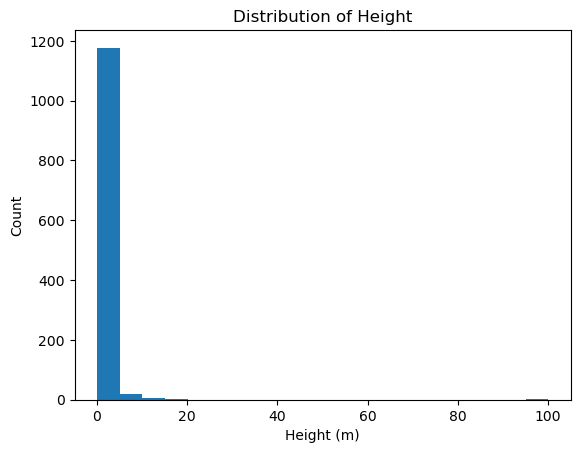

In [ ]:
# Distribution of Height
plt.hist(national_dex['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

[Text(0.5, 0, 'Height (m)'), Text(0.5, 1.0, 'Box Plot of Height')]

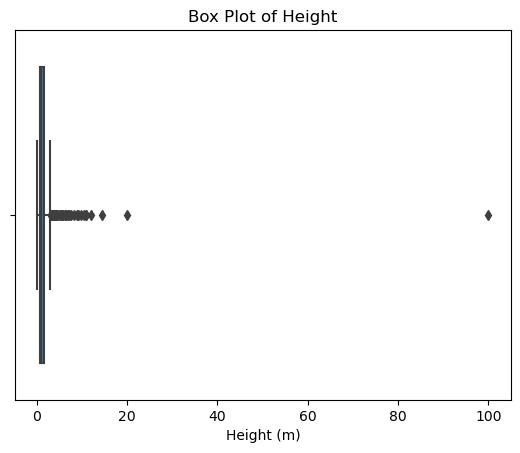

In [ ]:
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex['Height'])
height_boxplot.set(xlabel='Height (m)', title='Box Plot of Height')

In [ ]:
# There appears to be one clear outlier on height
# Create a dataframe that excludes the outlier
national_dex_no_outlier = national_dex[national_dex['Height'] < 90]
whats_the_new_max_height = national_dex_no_outlier['Height'].max()
# whats_the_new_max_height

# Height is positively skewed so median would be a better measure of central tendency
# Median height of pokemon
median_height = national_dex_no_outlier['Height'].median()
print(f"Median Height: {median_height}")



Median Height: 1.0


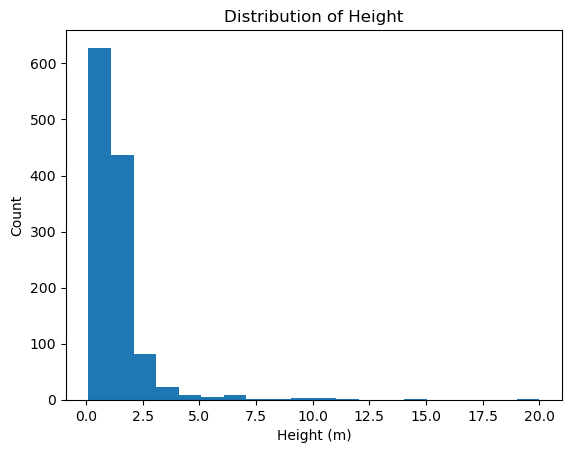

In [ ]:
# Revised distribution of Height
plt.hist(national_dex_no_outlier['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

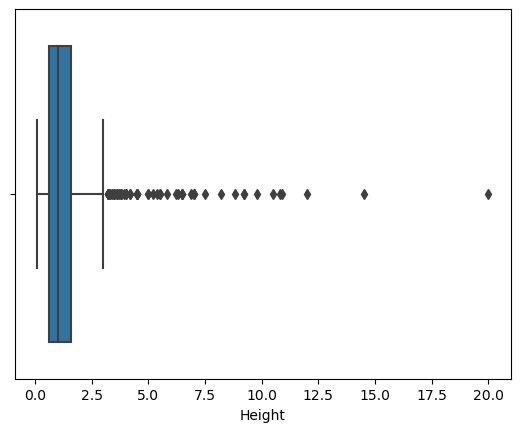

In [ ]:
# Still skewed, but better!
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex_no_outlier['Height'])

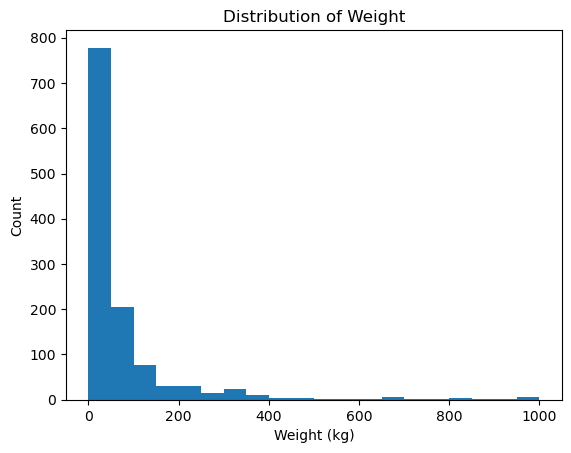

In [ ]:
# Distribution of Weight
plt.hist(national_dex_no_outlier['Weight'], bins=20)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.show()

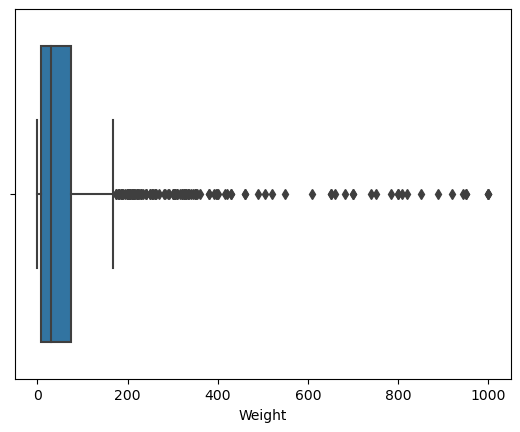

In [ ]:
# Box plot of Weight
weight_boxplot = sns.boxplot(x=national_dex_no_outlier['Weight'])

# There are some potential outliers, but they are all near each other so it is reasonable to keep them

In [ ]:
# Weight is positively skewed so median would be a better measure of central tendency
# Median weight of pokemon
median_weight = national_dex_no_outlier['Weight'].median()
print(f"Median Weight: {median_weight}")

Median Weight: 30.0


In [ ]:
# Height and Weight is skewed, so Spearman's rho would be better than Pearsons
corr, pval = spearmanr(national_dex_no_outlier['Height'], national_dex_no_outlier['Weight'])
print(f"Spearman's rho: {corr}")
print(f"P-value: {pval}")

# There is a strong positive correlation between height and weight

Spearman's rho: 0.844481710264344
P-value: 0.0


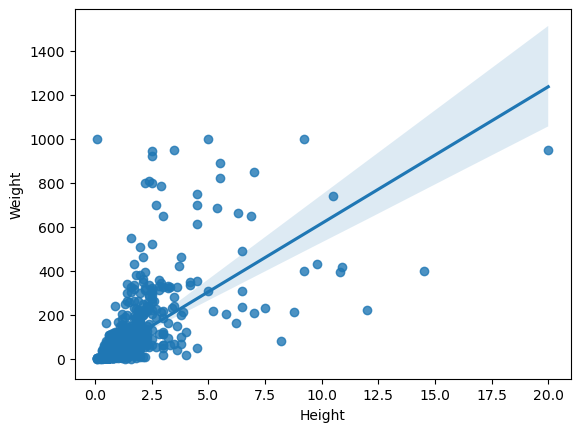

In [ ]:
# Create a scatterplot of height vs weight
height_by_weight = sns.regplot(x='Height', y='Weight', data=national_dex_no_outlier)

## Gender Encounter Rate
* ~~Overlapping Normal plots?~~
* Check if the unique values are the same for gender encounter
* Add photos for the different encounter rates

In [ ]:
# What are the unique combinations of Gender_Male, Gender_Female_, and Gender_Unknown?

# Select only the gender columns
gender_col = ["Gender_Male", "Gender_Female", "Gender_Unknown"]
unique_gender_rate = national_dex.loc[:, gender_col].copy()

# Sort the columns
unique_gender_rate = unique_gender_rate.sort_values(by=["Gender_Female"])

# Create a column that concatenates the gender rates
unique_gender_rate['Gender_Combination'] = unique_gender_rate.apply(lambda row: "M: " + str(row["Gender_Male"]) + ", F: " + str(row["Gender_Female"]) + ", U: " + str(row["Gender_Unknown"]), axis=1)

# How many unique combinations of the Gender_Combination column
num_unique_gender_rate = unique_gender_rate.groupby('Gender_Combination').size()

num_unique_gender_rate

Gender_Combination
M: 0.0, F: 0.0, U: 100.0    196
M: 0.0, F: 100.0, U: 0.0     46
M: 100.0, F: 0.0, U: 0.0     37
M: 12.5, F: 87.5, U: 0.0      2
M: 25.0, F: 75.0, U: 0.0     31
M: 50.0, F: 50.0, U: 0.0    724
M: 75.0, F: 25.0, U: 0.0     22
M: 87.5, F: 12.5, U: 0.0    145
dtype: int64

## Get Rate
* mean, median, mode, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest catch rates?

## Stats on Pokemon
* HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
* mean, median, mode, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest for each?
* Correlation between stats

In [ ]:
#Print Finally Done